<a href="https://colab.research.google.com/github/ro1238b/CODSOFT/blob/main/Titanic_survival_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Dependencies**


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

**Load The Dataset**

In [3]:
#Load the data from .CSV file to pandas frame
Titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

In [5]:
#load the first few rows of the dataset
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#load the last few rows of the dataset
Titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Display the shape of the data set
Titanic_data.shape

(891, 12)

In [8]:
#let's see the some information about the data
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Find how many values are missing
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Preprocessing the data**

In [10]:
#Drop the ("CABIN COLUMN FROM DATASET")
Titanic_data = Titanic_data.drop(columns='Cabin')

In [11]:
#let's see that the column will delete or not
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
# For the 'AGE' values we simplily find out the median of ages and replace the null values with Mean of Age
Titanic_data['Age'].fillna(Titanic_data['Age'].median(),inplace=True) # (fillna=> Fill missing values NaNs)


In [13]:
#let's see the updated dataset
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
#Now for Embarked we used Mode method so that we can find out most friquently appears data value
print(Titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [17]:
#replace the missing values with mode value
Titanic_data['Embarked'].fillna(Titanic_data['Embarked'].mode()[0],inplace=True)

In [18]:
#let's see the updated dataset
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
#As we see the data set is completly clean now.
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Visualization**

Survived
0    549
1    342
Name: count, dtype: int64

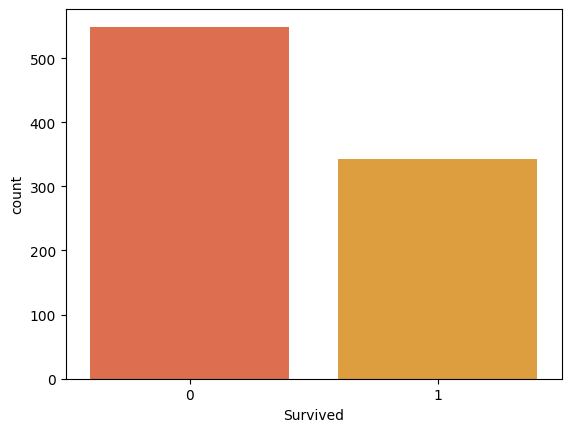

In [20]:
#Now count the number of people survived
custom_palette = ['#F56038', '#F7A325']
sns.countplot(x=Titanic_data['Survived'],palette=custom_palette)  # 0 means not Survived , 1 means Survived
Titanic_data['Survived'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

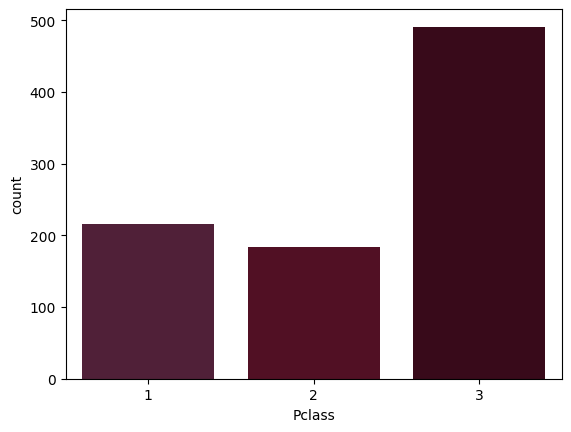

In [21]:
#Now Count the value for Pclass Passengers
custom_palette = ['#581838', '#5c0520','#400218']
sns.countplot(x=Titanic_data['Pclass'],palette=custom_palette) # 1=1st_class|2=2nd_class|3=3rd_class
Titanic_data['Pclass'].value_counts()

<Axes: xlabel='Pclass', ylabel='count'>

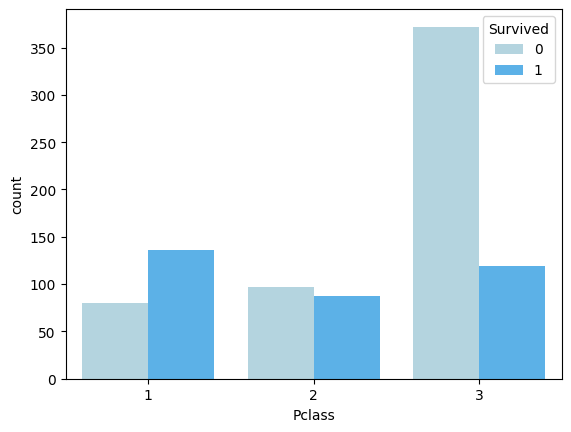

In [22]:
#let's see Number of 'Survival' according to Pclass
custom_palette = ['#ADD8E6', '#45b6fe']
sns.countplot(x=Titanic_data['Pclass'],hue=Titanic_data['Survived'],palette=custom_palette)

Sex
male      577
female    314
Name: count, dtype: int64

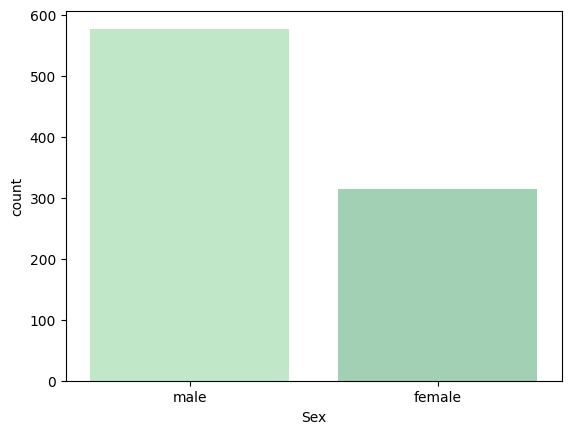

In [23]:
#Now Count the number of male passengers and female passengers
custom_palette = ['#b9eec3', '#99d8b3']
sns.countplot(x=Titanic_data['Sex'],palette=custom_palette)
Titanic_data['Sex'].value_counts()

Survived    0    1
Sex               
female     81  233
male      468  109


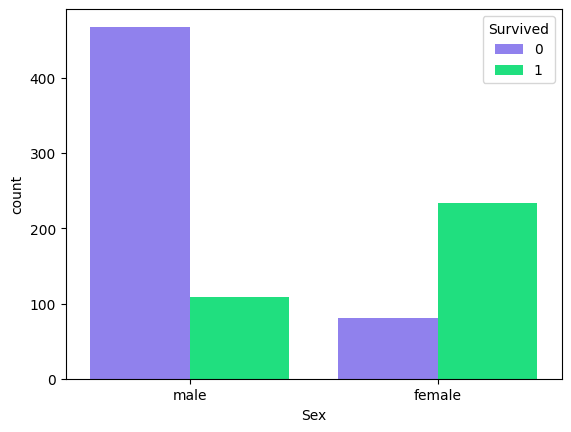

In [24]:
#let's see Number of 'Survival' according to Pclass
custom_palette = ['#836fff', '#00FF7F']
sns.countplot(x=Titanic_data['Sex'],hue=Titanic_data['Survived'],palette=custom_palette)
sex_survived_counts = Titanic_data.groupby(['Sex', 'Survived']).size()
sex_survived_counts_unstacked = sex_survived_counts.unstack()# Unstack the grouped data for a more readable format
print(sex_survived_counts_unstacked)

In [25]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
#Now i have to do that change all the Categorical values in Numerical values
Titanic_data['Sex']=Titanic_data['Sex'].map({'male':0,'female':1})
Titanic_data['Embarked']=Titanic_data['Embarked'].map({'S':0,'C':1,'Q':2})


In [27]:
Titanic_data.head() #Now we see that all the values will be convert 0 and 1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [28]:
Titanic_data['Sex'].value_counts()  #0=> Male , 1=> Female

Sex
0    577
1    314
Name: count, dtype: int64

In [29]:
Titanic_data['Embarked'].value_counts()  #0=> S , 1=>C , 2=>Q

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

**Define Target value**

In [30]:
#Now Seperate the features and Target variable which is 'Survived'
X=Titanic_data.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
Y=Titanic_data['Survived']

In [31]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [32]:
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
888       3    1  28.0      1      2  23.4500         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[891 rows x 7 columns]


In [33]:
print(Y.shape,X.shape)

(891,) (891, 7)


**Split the data**

In [34]:
#Now split the data into Tranning data set and Testing data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15)


**Train the data**

In [35]:
#Now Train the logistic Regression model
model = LogisticRegression() #initialize the model
model.fit(X_train,Y_train) #Train the model


LogisticRegression()

**Predic the data**

In [36]:
#Now predict the test data
prediction= model.predict(X_test)
score=accuracy_score(prediction,Y_test)
print(score * 100)

81.00558659217877


In [37]:
print(X.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [38]:
Titanic_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.45,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,1
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,2


**Aim:- Predict a person survived or not**

---



In [47]:
#Now predict that a person survied or not
sample_data = [[3,1,30,0,1,24,2]]
predict = model.predict(sample_data)
if predict[0] == 1:
  print("Person survived")
else:
  print("Person not survived")

Person survived
